# **Eksplorasi Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('text.csv')

In [ ]:
print(f"Rows: {df.shape[0]-1} Columns: {df.shape[1]}\n")
print(f"Column names: {df.columns}\n")

Rows: 416808 Columns: 3

Column names: Index(['Unnamed: 0', 'text', 'label'], dtype='object')



In [ ]:
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


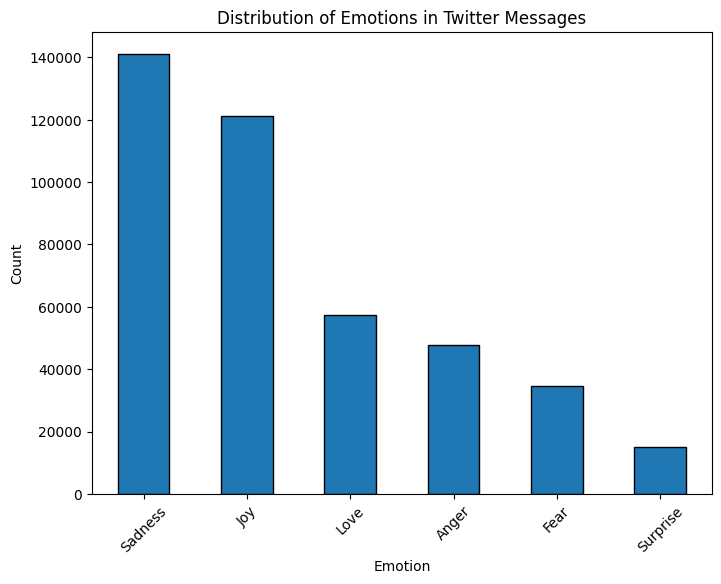

In [ ]:
plt.figure(figsize=(8, 6))
label_counts = df['label'].value_counts()
label_names = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
label_counts.index = label_names
label_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Emotions in Twitter Messages')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Preprpcessing**

**Cek duolikasi data**

In [ ]:
print(f"Are there any duplicates: {df.duplicated().values.any()}\n")

Are there any duplicates: False



**Periksa Nilai NaN**

In [ ]:
print(f"Are there any NaN values: {df.isna().values.any()}")
print(f"Where are the NaN values:\n{df.isna().sum()}")

Are there any NaN values: False
Where are the NaN values:
Unnamed: 0    0
text          0
label         0
dtype: int64


# **Bagi Data**

In [ ]:
# Membagi data menjadi fitur (X) dan label (y)
X = df['text']  # Fitur: text
y = df['label']  # Label: emotions

# Membagi data ke dalam set pelatihan dan pengujian (80% pelatihan, 20% pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mencetak bentuk set pelatihan dan pengujian
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (333447,) (333447,)
Testing set shape: (83362,) (83362,)


In [ ]:
# % dari set pelatihan
train_pct = 100 * len(X_train) / len(X)
print(f'Training data is {train_pct:.3}% of the total data.')

# % dari data uji
test_pct = 100 * len(X_test) / len(X)
print(f'Test data makes up the remaining {test_pct:.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


# **Pelatihan dan Evaluasi SVM**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [ ]:
def linear_SVC_train():
    # Membagi data menjadi set pelatihan dan pengujian
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

    # Membuat vektor data teks
    vectorizer = TfidfVectorizer(max_features=1000)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Mengatur parameter model
    model_params = {
        'C': 1.0,
        'loss': 'squared_hinge',
        'max_iter': 1000,
        'penalty': 'l2',
        'dual': True,
        'tol': 1e-4
    }

    # Menginisialisasi dan melatih model
    model = LinearSVC(**model_params)
    model.fit(X_train_vectorized, y_train)

    return model, vectorizer, X_test_vectorized, y_test

def evaluate_model(model, X_test, y_test):
    # PMemprediksi emosi pada set tes
    y_pred = model.predict(X_test)
    # Menampilkan laporan klasifikasi
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Memanggil fungsi untuk melatih model
trained_model, trained_vectorizer, X_test, y_test = linear_SVC_train()

# Panggil fungsi untuk mengevaluasi model
evaluate_model(trained_model, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     24201
           1       0.83      0.92      0.87     28164
           2       0.80      0.73      0.76      6929
           3       0.88      0.80      0.84     11441
           4       0.84      0.77      0.81      9594
           5       0.78      0.69      0.73      3033

    accuracy                           0.86     83362
   macro avg       0.84      0.80      0.82     83362
weighted avg       0.86      0.86      0.85     83362



In [ ]:
def linear_SVC_train():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

    # Vectorize the text data
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Set the model parameters
    model_params = {
        'C': 0.1,
        'loss': 'hinge',
        'max_iter': 5000,
        'penalty': 'l2',
        'dual': True,
        'tol': 1e-4
    }

    # Initialize and train the model
    model = LinearSVC(**model_params)
    model.fit(X_train_vectorized, y_train)

    return model, vectorizer, X_test_vectorized, y_test

def evaluate_model(model, X_test, y_test):
    # Predict emotions on the test set
    y_pred = model.predict(X_test)
    # Display the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Call the function to train the model
trained_model, trained_vectorizer, X_test, y_test = linear_SVC_train()

# Call the function to evaluate the model
evaluate_model(trained_model, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     24201
           1       0.89      0.96      0.92     28164
           2       0.90      0.70      0.79      6929
           3       0.92      0.89      0.90     11441
           4       0.86      0.86      0.86      9594
           5       0.90      0.63      0.74      3033

    accuracy                           0.90     83362
   macro avg       0.90      0.83      0.86     83362
weighted avg       0.90      0.90      0.90     83362



In [ ]:
# Memetakan angka ke nama emosi
emotion_mapping = {
    0: "Sadness",
    1: "Joy",
    2: "Love",
    3: "Anger",
    4: "Fear",
    5: "Surprise"
}

# Input teks
input_texts = [
    "good morning mental illness. totally depressed today",
    "The 75,000,000 great American Patriots who voted for me, AMERICA FIRST, and MAKE AMERICA GREAT AGAIN, will have a GIANT VOICE long into the future. They will not be disrespected or treated unfairly in any way, shape or form!!!",
    "Perhaps love was the accumulation of small things, little acts of consideration, the persistence of a man in loving even when he receives nothing in return",
    "I WILL DESTROY EVERYTHING THAT COMES IN THE WAY",
    "OMG, you scared the shit out of me!",
    "WOW!!! THAT WAS UNPREDICTABLE!"
]

def predict_emotion_for_text(text):
    # Memproses teks input menggunakan vektorizer yang telah dilatih sebelumnya
    text_vectorized = trained_vectorizer.transform([text])
    # Memprediksi emosi menggunakan model yang telah dilatih sebelumnya
    predicted_emotion_label = trained_model.predict(text_vectorized)[0]
    # Dapatkan nama emosi berdasarkan label yang diprediksi
    predicted_emotion = emotion_mapping[predicted_emotion_label]
    return predicted_emotion

# Prediksi emosi untuk teks masukan
predicted_emotions = [predict_emotion_for_text(text) for text in input_texts]

# Menampilkan emosi yang diprediksi untuk setiap teks masukan
for i, emotion in enumerate(predicted_emotions):
    print("Predicted emotion for text {}: {}".format(i + 1, emotion))

Predicted emotion for text 1: Sadness
Predicted emotion for text 2: Joy
Predicted emotion for text 3: Love
Predicted emotion for text 4: Joy
Predicted emotion for text 5: Fear
Predicted emotion for text 6: Joy


# **Pelatihan dan Evaluasi Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
def naive_bayes_classifier():
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    model = MultinomialNB()
    model.fit(X_train_vectorized, y_train)

    return model, vectorizer, X_test_vectorized, y_test

trained_model, trained_vectorizer, X_test, y_test = naive_bayes_classifier()
evaluate_model(trained_model, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     24201
           1       0.77      0.97      0.86     28164
           2       0.96      0.42      0.58      6929
           3       0.94      0.76      0.84     11441
           4       0.90      0.68      0.77      9594
           5       0.97      0.24      0.38      3033

    accuracy                           0.83     83362
   macro avg       0.90      0.67      0.72     83362
weighted avg       0.85      0.83      0.82     83362



In [ ]:
def naive_bayes_classifier():
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

    # Menggunakan TfidfVectorizer untuk mengubah teks menjadi vektor fitur
    # max_features=5000 artinya hanya menggunakan 5000 fitur teratas berdasarkan frekuensi
    vectorizer = TfidfVectorizer(max_features=5000)
    # Melatih vektorizer pada data pelatihan dan mengubahnya menjadi fitur
    X_train_vectorized = vectorizer.fit_transform(X_train)
    # Mengubah data pengujian menjadi fitur menggunakan vektorizer yang sama
    X_test_vectorized = vectorizer.transform(X_test)

    model = MultinomialNB(force_alpha=False, alpha=0, fit_prior=False)
    model.fit(X_train_vectorized, y_train)

    return model, vectorizer, X_test_vectorized, y_test

trained_model, trained_vectorizer, X_test, y_test = naive_bayes_classifier()
evaluate_model(trained_model, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     24201
           1       0.95      0.85      0.90     28164
           2       0.66      0.91      0.77      6929
           3       0.87      0.90      0.89     11441
           4       0.82      0.85      0.84      9594
           5       0.59      0.87      0.71      3033

    accuracy                           0.87     83362
   macro avg       0.81      0.88      0.83     83362
weighted avg       0.89      0.87      0.88     83362



/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:620: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


In [ ]:
# Memetakan angka ke nama emosi
emotion_mapping = {
    0: "Sadness",
    1: "Joy",
    2: "Love",
    3: "Anger",
    4: "Fear",
    5: "Surprise"
}

# Input texts
input_texts = [
    "good morning mental illness. totally depressed today",
    "The 75,000,000 great American Patriots who voted for me, AMERICA FIRST, and MAKE AMERICA GREAT AGAIN, will have a GIANT VOICE long into the future. They will not be disrespected or treated unfairly in any way, shape or form!!!",
    "Perhaps love was the accumulation of small things, little acts of consideration, the persistence of a man in loving even when he receives nothing in return",
    "I WILL DESTROY EVERYTHING THAT COMES IN THE WAY",
    "OMG, you scared the shit out of me!",
    "WOW!!! THAT WAS UNPREDICTABLE!"
]

def predict_emotion_for_text(text):
    # Memproses teks input menggunakan vektorizer yang telah dilatih sebelumnya
    text_vectorized = trained_vectorizer.transform([text])
    # Memprediksi emosi menggunakan model yang telah dilatih sebelumnya
    predicted_emotion_label = trained_model.predict(text_vectorized)[0]
    # Dapatkan nama emosi berdasarkan label yang diprediksi
    predicted_emotion = emotion_mapping[predicted_emotion_label]
    return predicted_emotion

# Prediksi emosi untuk teks masukan
predicted_emotions = [predict_emotion_for_text(text) for text in input_texts]

# Menampilkan emosi yang diprediksi untuk setiap teks masukan
for i, emotion in enumerate(predicted_emotions):
    print("Predicted emotion for text {}: {}".format(i + 1, emotion))

Predicted emotion for text 1: Sadness
Predicted emotion for text 2: Joy
Predicted emotion for text 3: Love
Predicted emotion for text 4: Anger
Predicted emotion for text 5: Fear
Predicted emotion for text 6: Surprise


# **Confussion Matrix**

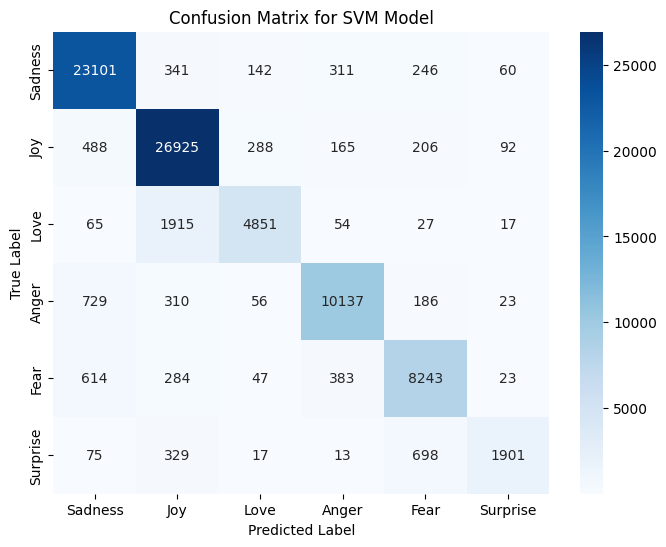

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menjalankan pelatihan dan evaluasi untuk model SVM
trained_model_svm, trained_vectorizer_svm, X_test_svm, y_test_svm = linear_SVC_train()

# Prediksi pada data uji menggunakan model SVM
y_pred_svm = trained_model_svm.predict(X_test_svm)

# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    # Menghitung confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Membuat plot confusion matrix menggunakan heatmap dari seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for SVM Model')
    plt.show()

# Menampilkan confusion matrix untuk model SVM
emotion_labels = ["Sadness", "Joy", "Love", "Anger", "Fear", "Surprise"]  # Label emosi
plot_confusion_matrix(y_test_svm, y_pred_svm, emotion_labels)
